In [12]:
import tweepy
from econfig import *
import datetime as dt
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
import psycopg2
import json

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

try:
    api.verify_credentials()
    print("Authentication Complete")
except:
    print("Authentication Unable to Complete")
    
two_days = (dt.datetime.now() - dt.timedelta(days=3)).strftime("%Y-%m-%d")
one_day = (dt.datetime.now() - dt.timedelta(days=2)).strftime("%Y-%m-%d")

# startDate = datetime.datetime(2014, 6, 1, 0, 0, 0)
# endDate =   datetime.datetime(2015, 1, 1, 0, 0, 0)
MAX_TWEETS = 5
tweets = tweepy.Cursor(api.search, q='#election2020', rpp=100, since=two_days, until=one_day).items()


Authentication Complete


In [5]:
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet.text)

Rate limit reached. Sleeping for: 830
Rate limit reached. Sleeping for: 831


In [10]:
p = 'dataisgreat'
conn = psycopg2.connect(user = "postgres",
                                  password = f"{p}",
                                  host = "127.0.0.1",
                                  port = "3306",
                                  database = "postgres")

cursor = conn.cursor()

In [16]:
for tweet in tweet_list:
    cursor.execute('INSERT INTO edf_tweets (data) VALUES (%s);', (json.dumps(tweet),))
    conn.commit()

In [17]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, StopWordsRemover

In [20]:
df = pd.DataFrame({"Tweets":tweet_list})
# df.to_csv("Tweets_List.csv",sep="|")
# from pyspark import SparkFiles
# df = spark.read.csv("Tweets_List.csv", sep="|", header=True)

tokened = Tokenizer(inputCol="Tweets", outputCol="words")
tokened_transformed = tokened.transform(df)
tokened_transformed.show()


remover = StopWordsRemover(inputCol="words", outputCol="filtered")
removed_frame = remover.transform(tokened_transformed)
# removed_frame.show(truncate=False)

AttributeError: Cannot load _jvm from SparkContext. Is SparkContext initialized?

In [27]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\niesa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\niesa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\niesa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [28]:
tokenized = [word_tokenize(tweet) for tweet in tweet_list]

In [29]:
tokenized[:10]

[['RT',
  '@',
  'OneDayPoll1',
  ':',
  'If',
  'the',
  'election',
  'was',
  'held',
  'today',
  'who',
  'are',
  'you',
  'voting',
  'for',
  'on',
  '2/24/2020',
  '#',
  'Election2020',
  '#',
  'Trump',
  '#',
  'PeteButtigieg',
  '#',
  'Sanders',
  '@',
  'JoeBiden…'],
 ['RT',
  '@',
  'FranceBernie',
  ':',
  '💥Bilan',
  'Post',
  'Nevada💥',
  '🔔',
  '@',
  'BernieSanders',
  'prend',
  'la',
  'tête',
  'de',
  'la',
  'primaire',
  'démocrate',
  'avec',
  '45',
  'délégués',
  'au',
  'total',
  '.',
  '(',
  'Iowa',
  '+',
  'New',
  'Hampsh…'],
 ['@',
  'scvbuckeye',
  '#',
  'Election2020',
  '🇺🇸',
  'RT',
  ':',
  'She',
  'can',
  '’',
  't',
  'even',
  'spell',
  '“',
  'American',
  '”',
  'correctly',
  '.',
  'https',
  ':',
  '//t.co/Vmk0PGwUJ0'],
 ['RT',
  '@',
  'SuMoh7',
  ':',
  '🔁Help',
  'defeat',
  'most',
  'vulnerable',
  'Republicans',
  'in',
  'the',
  '#',
  'Senate',
  'who',
  'are',
  'still',
  'to',
  'find',
  'their',
  'backbones',
  'in

In [50]:
import nltk
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\niesa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [108]:
filtered_tweets = []
for tweet in tokenized:
    filtered_tweet = []
    for word in tweet:
        if word.lower() not in stopwords and word not in string.punctuation and emoji_pattern.sub(r'', word):
            filtered_tweet.append(emoji_pattern.sub(r'', word.lower()))
    filtered_tweets.append(filtered_tweet)

In [75]:
filtered_tweets[1]

'OneDayPoll1'

In [66]:
tweet_list[1]

'RT @FranceBernie: 💥Bilan Post Nevada💥\n\n🔔@BernieSanders prend la tête de la primaire démocrate avec 45 délégués au total.\n(Iowa + New Hampsh…'

In [47]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [110]:
word_count = {}
for tweet in filtered_tweets:
    for word in tweet:
        if word.lower() in word_count.keys():
            word_count[word.lower()] += 1
        else:
            word_count[word.lower()] = 1

In [111]:
my_dict = {'key':"value"}

In [61]:
'key' in my_dict.keys()

True

In [92]:
del word_count["'s"]

In [94]:
word_count.keys().contains('t.co')

AttributeError: 'dict_keys' object has no attribute 'contains'

In [117]:
twitter_urls = [key for key, value in word_count.items() if 't.co' in key.lower()]

In [118]:
for url in twitter_urls:
    del word_count[url]

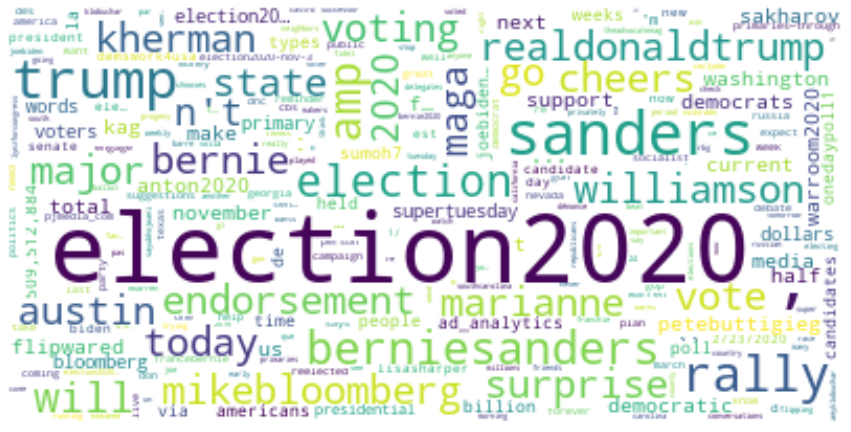

In [119]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 

wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
wc.generate_from_frequencies(word_count)
  
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud.png")
plt.show()


In [116]:
del word_count[""]

In [144]:
words = ['healthcare', 'terrorism', 'gun','guns', 'education', 'economy', 'immigration', 'climate', \
         'wealth', 'distribution', 'abortion', 'federal' 'budget', 'taxes', 'racism', 'sexism', 'metoo', \
         'diplomacy', 'lgbqt','lgbtq', 'equality', 'trade', 'war', 'democrat', 'republican', 'socialist', "communist", \
         'fascist', 'foreign', 'inclusivity', 'borders', 'medicare','nationalist','medicaid','democratic',\
        'inequality','justice','legalize','illegal','drugs','prescription','women','womens','rights','universal',\
        'supreme','court','potus','scotus','judge','maga','kaga','jobs','voting','voter','voters','daca',\
        'citizen','election','incumbent','independent','nominee','pac','party','lobbyist','gerrymandering',\
        'russia', 'russian', 'china', 'chinese', 'coronavirus', 'iowa', 'nevada', 'supertuesday', 'debate', \
         'debates', 'delegates', 'delegate', 'cnn', 'fox', 'golf', 'impeach', 'impeachment', 'senate', 'congress',\
         'capital','feelthebern', 'peteforamerica', 'ourbestdaysstilllieahead', 'notmeus', 'wintheera', \
         'dreambigfighthard', 'ilikemike', 'math', 'promisesmadepromiseskept', 'jobsnotmobs', 'keepamericagreat',\
        'believe', 'beliefs', 'bullshit', 'christian', 'family', 'values', 'millennials', 'latino', 'latina', 'latinx',\
        'grassroots','balance','policy','poll','platform','muslim','isis','arab','arabic','ewarren','berniesanders',\
        'petebuttigieg','realdonaltrump','mikebloomberg','joebiden','criminal', 'vice', 'epidemic', 'wrong', 'right',\
         'left','greed', 'threat', 'affordable', 'reform', 'promise', 'progress', 'support', 'protect', \
         'crisis', 'hate', 'debt', 'safe', 'freedom', 'win', 'lose','deficit','stock','market','nasdeq','hack','hacking',\
        'sanctuary','dissent','divide','divided','ballot','bailout','primary','usa','united','states','america','fraud',\
        'black','african','american','africanamerica','blacklivesmatter','blm','campgain','finance','civic','duty',\
         'altright','nazi','nazis','neonazi','neonazis','wage','wages','income','base','gop','epstein','capitalist',\
         'capitalism','dreamer','dreamers','border','detention','bluelivesmatter','ivanka','donald','melania']

In [145]:
len(words)

191

In [146]:
word_list_counts = {key:value for key, value in word_count.items() if key.lower() in words}

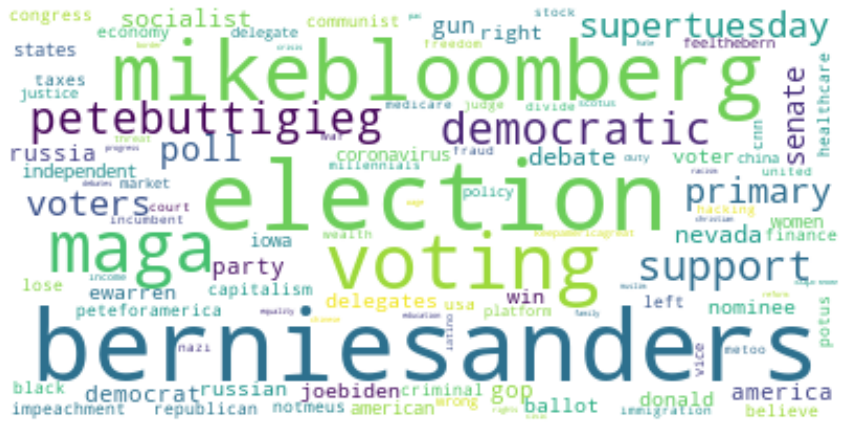

In [147]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 

wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
wc.generate_from_frequencies(word_list_counts)
  
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("word_list_cloud.png")
plt.show()
